In [99]:
# Independent variable functions
#      u(x,t_0) = f(x)
#      u(x_0,t) = g1(t)
#      u(x_n,t) = g2(t)
def f(x):
    """Inputs position array x and outputs f(x)."""
    import numpy as np
    return np.exp(x)

def g1(t):
    """Inputs time array t and outputs g1(t)."""
    import numpy as np
    return np.exp(t)

def g2(t):
    """Inputs time array t and outputs g2(t)."""
    import numpy as np
    return np.exp(1) + t


# Matrix generation functions
def initial_u_matrix(x_val,t_val):
    """
    Creates a very specific matrix that includes all our initial and boundary values such that our
    unknown values are 0.
    
    This foundation will be:
    [u(x_0,t_0) ; u(x_0,t_1) ; u(x_0,t_2) ; ... ; u(x_0,t_n)]
    [u(x_1,t_0) ;     0      ;     0      ; ... ;     0     ]
    [u(x_2,t_0) ;     0      ;     0      ; ... ;     0     ]
    [    ...    ;     0      ;     0      ; ... ;     0     ]
    [u(x_n,t_0) ; u(x_n,t_1) ; u(x_n,t_2) ; ... ; u(x_n,t_n)]
    =
    [ g1(t_0) ; g1(t_1) ; g1(t_2) ; ... ; g1(t_n) ]
    [ f(x_1)  ;    0    ;    0    ; ... ;    0    ]
    [ f(x_2)  ;    0    ;    0    ; ... ;    0    ]
    [  ...    ;    0    ;    0    ; ... ;    0    ]
    [ g2(t_0) ; g2(t_1) ; g2(t_2) ; ... ; g2(t_n) ]
    """
    import numpy as np
    
    # Create our zero matrix and make the first column f(x)
    matrix = np.zeros((x_val.size,x_val.size))
    matrix[:,0] = f(x_val)
    
    # Make the first row g1(t) and last row g2(t)
    matrix[0] = g1(t_val)
    matrix[-1] = g2(t_val)
    
    return matrix


def deriv_matrix(x_val):
    """Inputs a dimension to generate an nxn matrix with -x_i,x_i in each row and -x_i in the diagonal."""
    import numpy as np
    
    # Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal x_i's
    matrix = np.zeros((x_val.size-3,x_val.size-3))
    np.fill_diagonal(matrix,x_val[1:-2])
    
    
    
    
    # Add a row of 0's to the bottom and column of 0's to the left
    row = np.zeros((x_val.size-3,1))
    matrix = np.hstack((row, matrix))

    column = np.zeros((1,x_val.size-2))
    matrix = np.vstack((matrix, column))
    
    # Replace the new diagonals with -x_n
    np.fill_diagonal(matrix,-x_val[1:-1])
    
    return matrix


# Graphing function
def graph_3d(x,t,u):
    """Inputs position vector (x), time vector (t), and
    resulting displacement matrix (u) to generate a 3D surface graph."""
    
    # Import libraries
    from mpl_toolkits import mplot3d
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Create 3D axis and plot points
    fig = plt.figure(figsize=(12,10))
    ax = plt.axes(projection='3d')
    

    
    
    ax.plot_surface(x, t, u, cmap = 'viridis')
    
    # Label the axes
    ax.set_xlabel('Position')
    ax.set_ylabel('Time')
    ax.set_zlabel('Displacement')
    
    # Rotate and display the plot
    ax.view_init(40,220)
    ax.set_box_aspect(None, zoom=0.75)
    plt.show()




In [100]:
def xux_to_tut(x_max, t_max, interv_num):
    """
    We're solving x*u_x=t*u_t with initial condition u(x,t_0)=f(x) and 
    boundary conditions u(x_0,t)= g1(x) and u(x_n,t) = g2(x).
    
    {INSERT EXTRA INFO}
    """
    # Import modules
    import numpy as np
    from time import time
    begin = time()
    
    
    
    
    # Make our arrays of x and t inputs and our interval width constants
    # NOTE: We only need the width of the x-intervals for this.
    x_val = np.linspace(0, x_max, interv_num+2)[1:]
    t_val = np.linspace(0, t_max, interv_num+2)[1:]
    x_width = (x_val[-1]-x_val[0]) / interv_num
    
    
    
    
    # Make our input arrays into repeated matrices
    T_val, X_val = np.meshgrid(t_val,x_val)
    
    # Create the foundation for our output matrix
    U_val = initial_u_matrix(x_val,t_val)
    
    # Create our derivative matrix for V(t) = e^(At/h)
    D1_matrix = deriv_matrix(x_val)

    
    
    
    # Cycle through every 0-value in our U-matrix
    for column in range(1,interv_num+1):
        
        # We do all x-values at once per run, so we need to do 1 single t-value per run
        temp_t = np.ones((interv_num-1,1))*t_val[column]
        
        U_val[column][1:-1] = np.exp( np.matmul(D1_matrix, np.ravel(temp_t)) )
    
    # Display our graph
    graph_3d(X_val, T_val, U_val)
    print(f"Finished in {round(time()-begin,2)} seconds.")

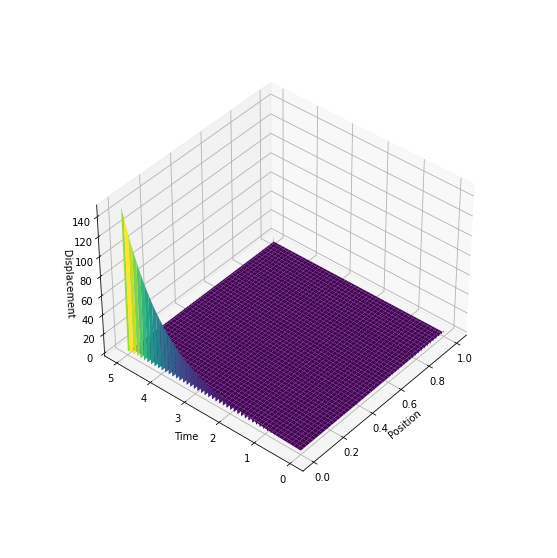

Finished in 0.45 seconds.


In [102]:
xux_to_tut(1, 5, 1000)